In [363]:
import pandas as pd
import numpy as np

news = pd.read_csv('news_articles.csv')
news = news[news['language'] == 'english']

news.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \r\nfox news sunday reported this m...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


Remove unimportant columns and add a length column. Typically articles below a certain length threshold are very
unlikely to actually be articles. Let's remove observations with text below a certain length.

In [364]:
# remove all columns except publication data, title, text, type, and label
news = news[['published', 'title', 'text', 'type', 'label']].dropna().reset_index(drop=True)

# add a length feature
news['length']  = news['text'].str.len()

# remove observation with text below and above a certain length
news = news.loc[news['length'] >= 500]
news = news.loc[news['length'] <= 15000]

og_news = news.copy()

news.head()

,published,title,text,type,label,length
1,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,bias,Real,1724
2,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \r\nfox news sunday reported this m...,bias,Real,1326
4,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,bias,Real,2052
5,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,bias,Real,1165
6,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,bias,Real,5653


Create histogram to examine number of articles with 'Real' vs 'Fake' labels.

In [365]:
import plotly.express as px

fig = px.histogram(news, x="label")
fig.show()

Examine distribution or article types.

In [366]:
fig = px.histogram(news, x="type")
fig.show()

Evaluate distribution of article lengths.

In [367]:
fig = px.histogram(news, x="length")
fig.show()

In [368]:
fig = px.histogram(news, x="length", color="label")
fig.show()

In [369]:
# Load the regular expression library
import re
# Remove punctuation
news['title_processed'] = \
news['title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert text to lowercase
news['title_processed'] = \
news['title_processed'].map(lambda x: x.lower())
# Print out the first rows of news
news['title_processed'].head()

1    re why did attorney general loretta lynch plea...
2    breaking weiner cooperating with fbi on hillar...
4    fantastic trumps  point plan to reform healthc...
5    hillary goes absolutely berserk on protester a...
6    breaking nypd ready to make arrests in weiner ...
Name: title_processed, dtype: object

In [370]:
# # Import the wordcloud library
# from wordcloud import WordCloud
# # Join the different processed titles together.
# long_string = ','.join(list(news['title_processed'].values))
# # Create a WordCloud object
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# # Generate a word cloud
# wordcloud.generate(long_string)
# # Visualize the word cloud
# wordcloud.to_image()

In [371]:
# #Prepare for LDA analysis
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]
# data = news.title_processed.values.tolist()
# data_words = list(sent_to_words(data))
# # remove stop words
# data_words = remove_stopwords(data_words)
# print(data_words[:1][0][:30])

In [372]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(data_words)
# # Create Corpus
# texts = data_words
# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
# # View
# print(corpus[:1][0][:30])

In [373]:
# #LDA
# from pprint import pprint
# # number of topics
# num_topics = 4
# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)

In [374]:
# # Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [375]:
# # Visualize the topics
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=stop_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

In [376]:
# perform stratified sampling to get a balanced, sample dataset
sample_news = og_news.groupby('label', group_keys=False).apply(lambda x: x.sample(100, random_state=1))
og_news = og_news.drop(sample_news.index)

# shuffle the observations so real and fake labels are not grouped together
from sklearn.utils import shuffle
sample_news = shuffle(sample_news, random_state=1)

sample_news.head()

,published,title,text,type,label,length
1216,2016-10-26T21:21:57.313+03:00,leaked hillary would completely ban the most p...,surgeons admit that mammography is outdated an...,junksci,Fake,3884
1762,http://theeconomiccollapseblog.com/wp-content/...,bs,ezekiel emanuel laughed on wednesday as the ho...,bs,Fake,2689
52,2016-11-17T00:41:00.000+02:00,cbs minutes withheld trumps appeal to stop at...,november by wire leave a comment \r\nwilliam...,conspiracy,Fake,2254
1701,2016-11-10T23:00:59.603+02:00,what the election has exposed,reply \r\naccording to numerous reports and s...,hate,Real,6078
1350,2016-10-28T18:10:27.176+03:00,the banishment of trump has begun as the ameri...,by hrafnkell haraldsson on mon oct st at pm ...,bias,Real,3343


At the moment, the text is unbearable to read. Let's add punctuation using Hugging Face's bert-restore-punctuation.

In [377]:
from deepmultilingualpunctuation import PunctuationModel

model = PunctuationModel()

def apply_function_to_partitions(input_string):
    # Split the input string into 10 partitions
    n = len(input_string)
    partition_size = n // 10
    partitions = [input_string[i:i+partition_size] for i in range(0, n, partition_size)]

    # Apply the function to each partition
    partition_results = [model.restore_punctuation(str(partition)) for partition in partitions]
    
    # Remove unnecessary final period at end of each string
    partition_results = [partition[:-1] for partition in partition_results]

    # Concatenate the results and return the final string
    return ''.join(partition_results)


sample_news['cleaned'] = 0
sample_news['cleaned'] = sample_news['text'].map(lambda x: apply_function_to_partitions(x))
    
sample_news.head()

loading configuration file config.json from cache at C:\Users\nicol/.cache\huggingface\hub\models--oliverguhr--fullstop-punctuation-multilang-large\snapshots\9977cb96c2c89abe7fa7adcfebf6d79808544bd4\config.json
Model config XLMRobertaConfig {
  "_name_or_path": "oliverguhr/fullstop-punctuation-multilang-large",
  "architectures": [
    "XLMRobertaForTokenClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "0",
    "1": ".",
    "2": ",",
    "3": "?",
    "4": "-",
    "5": ":"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "label2id": {
    ",": 2,
    "-": 4,
    ".": 1,
    "0": 0,
    ":": 5,
    "?": 3
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 16,
  "num_hidden_layers": 2

,published,title,text,type,label,length,cleaned
1216,2016-10-26T21:21:57.313+03:00,leaked hillary would completely ban the most p...,surgeons admit that mammography is outdated an...,junksci,Fake,3884,surgeons admit that mammography is outdated an...
1762,http://theeconomiccollapseblog.com/wp-content/...,bs,ezekiel emanuel laughed on wednesday as the ho...,bs,Fake,2689,ezekiel emanuel laughed on wednesday as the ho...
52,2016-11-17T00:41:00.000+02:00,cbs minutes withheld trumps appeal to stop at...,november by wire leave a comment \r\nwilliam...,conspiracy,Fake,2254,november by wire. leave a comment. william mcg...
1701,2016-11-10T23:00:59.603+02:00,what the election has exposed,reply \r\naccording to numerous reports and s...,hate,Real,6078,reply. according to numerous reports and stori...
1350,2016-10-28T18:10:27.176+03:00,the banishment of trump has begun as the ameri...,by hrafnkell haraldsson on mon oct st at pm ...,bias,Real,3343,by hrafnkell haraldsson on mon oct st at pm. t...


In [378]:
def capitalize_sentences(s):
    # Split the string into sentences using period (.), exclamation mark (!), or question mark (?) as the delimiter
    sentences = re.split('(?<=[.!?]) +', s)
    
    # Capitalize the first letter of each sentence
    capitalized_sentences = [sentence.capitalize() for sentence in sentences]
    
    # Join the sentences back together
    result = ' '.join(capitalized_sentences)
    
    return result

sample_news['cleaned'] = sample_news['cleaned'].map(lambda x: capitalize_sentences(x))

sample_news.head()

,published,title,text,type,label,length,cleaned
1216,2016-10-26T21:21:57.313+03:00,leaked hillary would completely ban the most p...,surgeons admit that mammography is outdated an...,junksci,Fake,3884,Surgeons admit that mammography is outdated an...
1762,http://theeconomiccollapseblog.com/wp-content/...,bs,ezekiel emanuel laughed on wednesday as the ho...,bs,Fake,2689,Ezekiel emanuel laughed on wednesday as the ho...
52,2016-11-17T00:41:00.000+02:00,cbs minutes withheld trumps appeal to stop at...,november by wire leave a comment \r\nwilliam...,conspiracy,Fake,2254,November by wire. Leave a comment. William mcg...
1701,2016-11-10T23:00:59.603+02:00,what the election has exposed,reply \r\naccording to numerous reports and s...,hate,Real,6078,Reply. According to numerous reports and stori...
1350,2016-10-28T18:10:27.176+03:00,the banishment of trump has begun as the ameri...,by hrafnkell haraldsson on mon oct st at pm ...,bias,Real,3343,By hrafnkell haraldsson on mon oct st at pm. T...


In [379]:
# # Split dataframe into 20 equal parts
# split_df = np.array_split(sample_news, 20)

# # Loop over each part and write to a separate text file
# for i, part in enumerate(split_df):
    
#     text_list = list(part['cleaned'])
    
#     with open(f"panel_surveys/panel_{i}.txt", 'w') as f:
#         for line in text_list:
#             f.write(f"NEXT ARTICLE:\n\n{line}\n\n\n")
    
#     f.close()

# sample_news[['cleaned']].to_csv('for_chatGPT.csv', encoding='utf-8')

In [349]:
news['label'] = news['label'].replace(['Fake','Real'],[0,1])
sample_news['label'] = sample_news['label'].replace(['Fake','Real'],[0,1])

# split into training and test set (scikitlearn)
from sklearn.model_selection import train_test_split

# # for full dataset
# news_X_train, news_X_test, news_y_train, news_y_test = train_test_split(news['text'], news['label'], stratify = news['label'], test_size=0.2)
# news_X_train, news_X_valid, news_y_train, news_y_valid = train_test_split(news_X_train, news_y_train, stratify = news_y_train, test_size=0.2)

# # for sample dataset
# news_X_train, news_X_valid, news_y_train, news_y_valid = train_test_split(sample_news['text'], sample_news['label'], stratify = sample_news['label'], test_size=0.1)
# news_X_test, temp_X, news_y_test, temp_y = train_test_split(news['text'], news['label'], stratify = news['label'], test_size=0.7)

# for sample + chunk of full dataset for better overall accuracy
chunk = og_news.groupby('label', group_keys=False).apply(lambda x: x.sample(250, random_state=1))
chunk = shuffle(chunk, random_state=1)
hybrid = pd.concat([sample_news, chunk])
hybrid['label'] = hybrid['label'].replace(['Fake','Real'],[0,1])
news_X_train, news_X_valid, news_y_train, news_y_valid = train_test_split(hybrid['text'], hybrid['label'], stratify = hybrid['label'], test_size=0.1)
news_X_test, temp_X, news_y_test, temp_y = train_test_split(news['text'], news['label'], stratify = news['label'], test_size=0.5)


In [350]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base')

loading file vocab.json from cache at C:\Users\nicol/.cache\huggingface\hub\models--roberta-base\snapshots\bc2764f8af2e92b6eb5679868df33e224075ca68\vocab.json
loading file merges.txt from cache at C:\Users\nicol/.cache\huggingface\hub\models--roberta-base\snapshots\bc2764f8af2e92b6eb5679868df33e224075ca68\merges.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at None
loading configuration file config.json from cache at C:\Users\nicol/.cache\huggingface\hub\models--roberta-base\snapshots\bc2764f8af2e92b6eb5679868df33e224075ca68\config.json
Model config RobertaConfig {
  "_name_or_path": "roberta-base",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_

In [351]:
max_length = 512

news_X_train = [str(i) for i in news_X_train.values]
news_X_valid = [str(i) for i in news_X_valid.values]

train_encodings = tokenizer(news_X_train, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(news_X_valid, truncation=True, padding=True, max_length=max_length)

In [352]:
import torch

class FakeNewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = FakeNewsDataset(train_encodings, news_y_train.to_numpy())
valid_dataset = FakeNewsDataset(valid_encodings, news_y_valid.to_numpy())

In [353]:
# load the model
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)

loading configuration file config.json from cache at C:\Users\nicol/.cache\huggingface\hub\models--roberta-base\snapshots\bc2764f8af2e92b6eb5679868df33e224075ca68\config.json
Model config RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

loading weights file pytorch_model.bin from cache at C:\Users\nicol/.cache\huggingface\hub\models--roberta-base\snapshots\bc2764f8af2e92b6eb5679868df33e224075ca68\pytorch_model.bin
Some we

In [354]:
from sklearn.metrics import accuracy_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  # calculate accuracy using sklearn's function
  acc = accuracy_score(labels, preds)
  return {
      'accuracy': acc,
  }

In [355]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=400,               # log & save weights each logging_steps
    save_steps=400,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

using `logging_steps` to initialize `eval_steps` to 400
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [356]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [357]:
import os

os.environ["WANDB_DISABLED"] = "true"

# train the model
trainer.train()

C:\Users\nicol\anaconda3\lib\site-packages\transformers\optimization.py:306: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

***** Running training *****
  Num examples = 630
  Num Epochs = 5
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 395
  Number of trainable parameters = 124647170


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=395, training_loss=0.5264994947216178, metrics={'train_runtime': 21161.9038, 'train_samples_per_second': 0.149, 'train_steps_per_second': 0.019, 'total_flos': 828799824384000.0, 'train_loss': 0.5264994947216178, 'epoch': 5.0})

In [358]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 70
  Batch size = 20


{'eval_loss': 0.7592517137527466,
 'eval_accuracy': 0.7857142857142857,
 'eval_runtime': 145.7539,
 'eval_samples_per_second': 0.48,
 'eval_steps_per_second': 0.027,
 'epoch': 5.0}

In [359]:
def get_prediction(text):
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt")
    # perform inference to our model
    outputs = model(**inputs)
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    # executing argmax function to get the candidate label
    return probs.argmax().numpy()

In [360]:
pred_vector = news_X_test.map(lambda x: get_prediction(str(x)))

In [361]:
from sklearn.metrics import classification_report
print(classification_report(news_y_test, pred_vector))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81       480
           1       0.65      0.94      0.77       287

    accuracy                           0.79       767
   macro avg       0.80      0.82      0.79       767
weighted avg       0.84      0.79      0.79       767



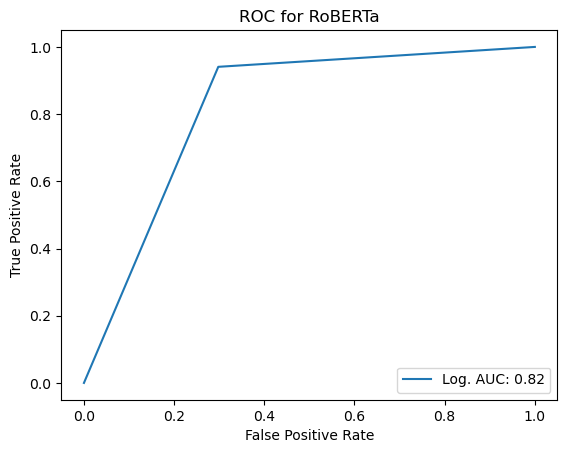

In [362]:
# make roc curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# metrics for logistic regression
fpr_logreg, tpr_logreg, _ = roc_curve(news_y_test, pred_vector)
auc_logreg = roc_auc_score(news_y_test, pred_vector)

# plot the info
plt.plot(fpr_logreg, tpr_logreg, label='Log. AUC: {0:0.2f}'.format(auc_logreg))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for RoBERTa')
plt.legend(loc='lower right')
plt.show()